In [196]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [197]:
#Reading and visualization
file = pd.read_csv("data2.csv", header=None)

print(file)
# randomizing the data
file = file.sample(frac=1, random_state=3)
# split index
training_set_index = round(len(file) * 0.8)
# convert to numpy
file = file.to_numpy()
# split into train and test set

training_set = file[:training_set_index]
testing_set = file[training_set_index:]

         0      1  2
0    0.658  1.570  1
1    0.676  1.185  1
2   -0.084  0.343  0
3    1.019  0.956  1
4    0.853  0.901  1
..     ...    ... ..
495 -0.054  0.776  0
496  0.222 -0.574  0
497 -0.451  0.038  0
498  0.022  0.354  0
499  0.190  0.149  0

[500 rows x 3 columns]


In [198]:
def print_scatter(file, which_set):
    positive_mask = file[:, -1] == 1
    negative_mask = file[:, -1] == 0
    positives = file[positive_mask, :]
    negatives = file[negative_mask, :]
    plt.scatter(positives[:, 0], positives[:, 1], color='blue')
    plt.scatter(negatives[:, 0], negatives[:, 1], color="orange")
    plt.title(which_set)

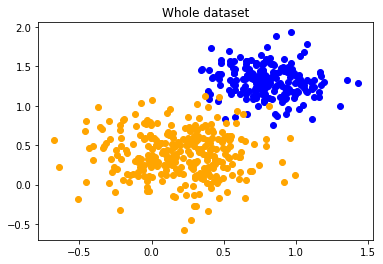

In [199]:
print_scatter(file, "Whole dataset")

In [200]:
X = training_set[:, :-1]
Y = training_set[:, [-1]]

In [201]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [202]:
def stick_column_with_one(X):
    n = X.shape[0]
    ones = np.ones((n, 1))
    return np.hstack((ones, X))

In [203]:
# The gradient descent function for logistic regression
def gradient_descent(X, Y, learning_rate, num_iters):
    # normalizing the input and formatting
    x_min = X.min(axis=0, keepdims=True)
    x_max = X.max(axis=0, keepdims=True)
    x_calc = (X - x_min) / (x_max - x_min)
    x_calc = stick_column_with_one(x_calc)

    n, d = x_calc.shape
    theta = np.zeros((d, 1))

    for i in range(num_iters):
        prediction = sigmoid(np.matmul(x_calc, theta))
        error = Y - prediction
        theta += (learning_rate) * np.matmul(np.transpose(x_calc), error)

    def predict(x_predict, params=False):
        """predicts value based on training, returns parameters if params=True"""
        if (params):
            return theta
        # normalize
        x_c = (x_predict - x_min) / (x_max - x_min)
        x_c = stick_column_with_one(x_c)
        our_prediction = sigmoid(np.matmul(x_c, theta))
        return np.where(our_prediction >= 0.5, 1, 0)

    return predict

In [204]:
predictor = gradient_descent(X, Y, 0.1, 10000)

The values of thetas are printed below

In [205]:
print(predictor(0, 1))

[[-34.5046115 ]
 [ 20.16466527]
 [ 37.83094594]]


In [206]:
# Testing the accuracy
testing_xs = testing_set[:, :-1]
testing_ys = testing_set[:, [-1]]
predicted_ys = predictor(testing_xs)
total_predictions = predicted_ys.size
accuracy = (predicted_ys == testing_ys).sum() / total_predictions
print(accuracy)

0.98


In [207]:
def plotDecisionBoundary2d(file, which_set, thetas):
    theta_dim = np.shape(thetas)[0]
    x_coeffs = thetas[:theta_dim-1]
    y_coeff = thetas[theta_dim-1][0]
    rows_xs = np.arange(0, 1, 0.01)
    n = np.size(rows_xs)
    xs = np.linspace(rows_xs, rows_xs, 1)
    xs = np.transpose(xs)
    
    for i in range(2, theta_dim-1):
        xs = np.append(xs, xs[:, 0] ** i, axis=1)
    
    ones = np.ones((n, 1))
    xs = np.hstack((ones, xs))
    ys = (np.matmul(xs, x_coeffs))/(-y_coeff)
    
    plt.plot(xs[:, 1], ys, color='green')
    file_min = file.min(axis=0, keepdims=True)
    file_max = file.max(axis=0, keepdims=True)
    print_scatter((file - file_min) / (file_max - file_min), which_set)
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.show()

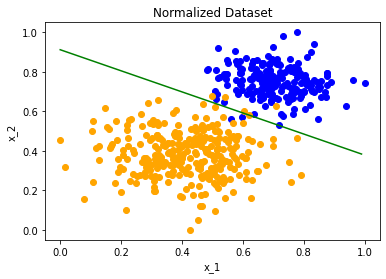

In [208]:
plotDecisionBoundary2d(file, "Normalized Dataset", predictor(0, True))

The original data had to be normalized for plotting